In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
import keras as ks
import os

Using TensorFlow backend.


In [2]:
img_size=150

In [3]:
train_Ddir=ImageDataGenerator(rescale=1./255)
test_Ddir=ImageDataGenerator(rescale=1./255)

In [4]:
train_data=train_Ddir.flow_from_directory(directory='train',
                                         batch_size=32,
                                         target_size=(img_size,img_size),
                                         shuffle=True,
                                          class_mode='binary',
                                         subset='training')

val_data=test_Ddir.flow_from_directory(directory='test',
                                           batch_size=32,
                                               target_size=(img_size,img_size),                    
                                               class_mode='binary')

test_data=train_Ddir.flow_from_directory(directory='val',
                                           batch_size=32,
                                               target_size=(img_size,img_size),                    
                                               class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [13]:
np_clases=np.array(['normal','pnemonia'])

# TRAIN DATA

In [17]:
def show_batch(image_batch,label_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax=plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        #plt.title(np_clases[label_batch[n]==1][0].title())
        plt.axis('off')

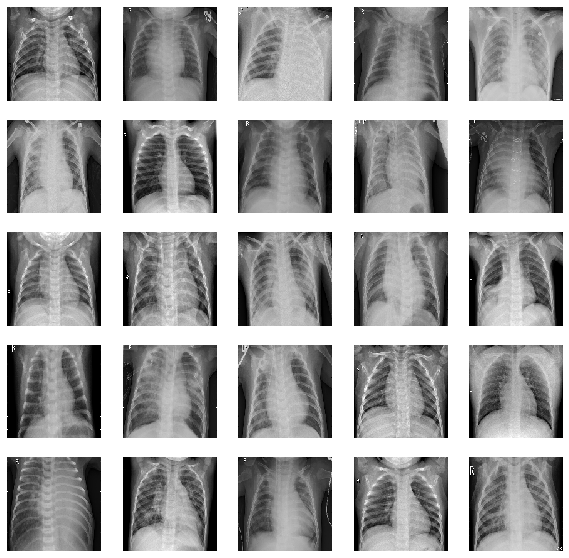

In [18]:
image_batch,label_batch =next(train_data)
show_batch(image_batch,label_batch)

In [32]:
train_total=4173
val_total=16
test_total=624

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(2,activation='softmax'))

In [58]:
model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 15, 15, 128)      

In [60]:
Epoch = 10
history=model.fit_generator(
    train_data,
    epochs=Epoch,
    validation_data=val_data
)

Epoch 1/10
163/163 [==============================] - 172s 1s/step - loss: 0.4173 - accuracy: 0.8234 - val_loss: 0.4060 - val_accuracy: 0.8125
Epoch 2/10
163/163 [==============================] - 172s 1s/step - loss: 0.1503 - accuracy: 0.9411 - val_loss: 0.9657 - val_accuracy: 0.6875
Epoch 3/10
163/163 [==============================] - 173s 1s/step - loss: 0.1009 - accuracy: 0.9626 - val_loss: 0.7339 - val_accuracy: 0.6875
Epoch 4/10
163/163 [==============================] - 172s 1s/step - loss: 0.0844 - accuracy: 0.9676 - val_loss: 0.4244 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 173s 1s/step - loss: 0.0722 - accuracy: 0.9739 - val_loss: 0.1104 - val_accuracy: 1.0000
Epoch 6/10
163/163 [==============================] - 173s 1s/step - loss: 0.0582 - accuracy: 0.9781 - val_loss: 0.0482 - val_accuracy: 1.0000
Epoch 7/10
163/163 [==============================] - 173s 1s/step - loss: 0.0480 - accuracy: 0.9816 - val_loss: 0.2503 - val_accuracy: 0.8750

In [63]:

acry=model.evaluate_generator(test_data)

In [64]:
print("\n%s: %.2f%%" % (model.metrics_names[1], acry[1]*100))


accuracy: 79.17%
